In [1]:
!nvidia-smi

Wed May 17 00:14:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

- pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade

In [2]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 451.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+

- Install MMCV using MIM

In [3]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 8.4 MB/s eta 0:00:00


- Install MMDetection from the source

In [4]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36083, done.
remote: Counting objects: 100% (737/737), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 36083 (delta 377), reused 626 (delta 356), pack-reused 35346
Receiving objects: 100% (36083/36083), 52.11 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (25315/25315), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


- Verification

In [5]:
import mmdet
print(mmdet.__version__)

2.28.2


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


- Inference

In [6]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 10.1 MB/s eta 0:00:00
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /content/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /content/mmdetection


In [7]:
from mmdet.apis import init_detector, inference_detector

config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

In [8]:
import os
import glob
import shutil
import pandas as pd
import mmcv
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset
from mmcv import Config

# Train A Detector on A Customized Dataset

**LISA Traffic Light Dataset 다운로드**

In [24]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# permmision warning 방지
!chmod 600 ~/.kaggle/kaggle.json

# download the data
!kaggle datasets download -d mbornoe/lisa-traffic-light-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json
100% 4.21G/4.21G [00:59<00:00, 104MB/s] 
100% 4.21G/4.21G [00:59<00:00, 75.8MB/s]


In [25]:
!mkdir lisa-traffic-light-dataset
# unzip
!unzip -q lisa-traffic-light-dataset.zip -d lisa-traffic-light-dataset

mkdir: cannot create directory ‘lisa-traffic-light-dataset’: File exists


**Dataset의 디렉토리 구조 보기**

In [11]:

# install tree first
!apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 1s (83.5 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122520 files and directories currently installed.)
Preparing to unpack .../tree_1.8.0-1_amd64.deb ...
Unpacking tree (1.8.0-1) ...
Setting up tree (1.8.0-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [12]:
!pwd

/content/mmdetection


In [13]:
!tree ./lisa-traffic-light-dataset/Annotations

./lisa-traffic-light-dataset/Annotations [error opening dir]

0 directories, 0 files


## 이미지 폴더 생성
- dayTrain, nightTrain : Train
- daySequence1, nightSequence1 : valid
- daySequence2, nightSequence2 : test

**이미지 파일 갯수**

In [14]:
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
        count += len(files)
    return count

In [15]:
# dayTrain img 파일
path = './lisa-traffic-light-dataset/dayTrain/'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa-traffic-light-dataset/dayTrain/: 0


In [ ]:
# nightTrain img 파일
path = './lisa-traffic-light-dataset/nightTrain/'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa-traffic-light-dataset/nightTrain/: 6501


In [ ]:
# daySequence1 img 파일
path = './lisa-traffic-light-dataset/daySequence1/'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa-traffic-light-dataset/daySequence1/: 4061


In [ ]:
# nightSequence1 img 파일
path = './lisa-traffic-light-dataset/nightSequence1/'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa-traffic-light-dataset/nightSequence1/: 4993


In [ ]:
# daySequence2 img 파일
path = './lisa-traffic-light-dataset/daySequence2/'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa-traffic-light-dataset/daySequence2/: 6895


In [ ]:
# nightSequence2 img 파일
path = './lisa-traffic-light-dataset/nightSequence2/'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa-traffic-light-dataset/nightSequence2/: 6535


**train, valid, test 이미지 폴더 만들기**

In [16]:
!mkdir lisa_train
!mkdir lisa_val
!mkdir lisa_test

In [20]:
# 복사할 이미지 파일이 들어있는 두 폴더 경로
folder1 = './lisa-traffic-light-dataset/dayTrain/dayTrain'
folder2 = './lisa-traffic-light-dataset/nightTrain/nightTrain'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder = './lisa_train'

# source_folder를 재귀적으로 순회하면서 이미지 파일들을 복사
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(img_file, target_file)

for root, dirs, files in os.walk(folder2):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(img_file, target_file)

In [21]:
# lisa_train img 파일
path = './lisa_train'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_train: 0


In [19]:
# 복사할 이미지 파일이 들어있는 두 폴더 경로
folder1 = './lisa-traffic-light-dataset/daySequence1/daySequence1/frames'
folder2 = './lisa-traffic-light-dataset/nightSequence1/nightSequence1/frames'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder = './lisa_val'

# source_folder를 재귀적으로 순회하면서 이미지 파일들을 복사
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(img_file, target_file)

for root, dirs, files in os.walk(folder2):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(img_file, target_file)

In [ ]:
# lisa_val img 파일
path = './lisa_val'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_val: 9053


In [22]:
folder1 = './lisa-traffic-light-dataset/daySequence2/daySequence2/frames'
folder2 = './lisa-traffic-light-dataset/nightSequence2/nightSequence2/frames'

# 복사할 이미지 파일의 대상 폴더 경로
target_folder = './lisa_test'

# source_folder를 재귀적으로 순회하면서 이미지 파일들을 복사
for root, dirs, files in os.walk(folder1):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(img_file, target_file)

for root, dirs, files in os.walk(folder2):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            img_file = os.path.join(root, file)
            target_file = os.path.join(target_folder, file)
            shutil.copy(img_file, target_file)

In [ ]:
# lisa_test img 파일
path = './lisa_test'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_test: 13428


## annotation csv 파일 합치기

In [26]:
DATA_PATH = './lisa-traffic-light-dataset/'

DAY_TRAIN_PATH = './lisa-traffic-light-dataset/Annotations/Annotations/dayTrain/'
NIGHT_TRAIN_PATH = './lisa-traffic-light-dataset/Annotations/Annotations/nightTrain/'

import os

os.listdir(DAY_TRAIN_PATH)

from tqdm import tqdm

train_day = []
for clipName in tqdm(sorted(os.listdir(DAY_TRAIN_PATH))):
    if 'dayClip' not in clipName:
        continue
    df = pd.read_csv(os.path.join(DAY_TRAIN_PATH, clipName, 'frameAnnotationsBOX.csv'), sep=';')
    train_day.append(df)
    
train_day_df = pd.concat(train_day, axis=0)
train_day_df['isNight'] = 0
    
train_night = []
for clipName in tqdm(sorted(os.listdir(NIGHT_TRAIN_PATH))):
    if 'nightClip' not in clipName:
        continue
    df = pd.read_csv(os.path.join(NIGHT_TRAIN_PATH, clipName, 'frameAnnotationsBOX.csv'), sep=';')
    train_night.append(df)

train_night_df = pd.concat(train_night, axis=0)
train_night_df['isNight'] = 1 # 밤을 구분하기 위함

df = pd.concat([train_day_df, train_night_df], axis=0)
df = df.drop(['Origin file',  'Origin track', 'Origin track frame number'], axis=1)

# filename들이 다르게 설정되어 있기 때문에 그것을 해결하기 위한 작업
# Ex. dayTraining/dayClip1--00000.jpg -> dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH, f'nightTrain/nightTrain/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH, f'dayTrain/dayTrain/{clipName}/frames/{splitted[-1]}')

li=[]
for i in range(len(df)):
  if(df.iloc[i]['Origin frame number'] % 10==0):
    li.append(i)

df=df.iloc[li,:]


def changeAnnotation(x):
    if 'go' in x['Annotation tag']:
        return 'go'
    elif 'warning' in x['Annotation tag']:
        return 'warning'
    elif 'stop' in x['Annotation tag']:
        return 'stop'
    
df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

annotation_tags = df['Annotation tag'].unique()


df['Filename'] = df.apply(changeFilename, axis=1)
df.to_csv('training_data.csv', index=False)
print(f'Finished processing {df.shape[0]} rows')
df.head()

100%|██████████| 5/5 [00:00<00:00, 74.87it/s]


Finished processing 5206 rows


<ipython-input-26-ed1790f9854c>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annotation tag'] = df.apply(changeAnnotation,axis=1)


,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isNight
0,./lisa-traffic-light-dataset/dayTrain/dayTrain...,go,698,333,710,358,0,0
1,./lisa-traffic-light-dataset/dayTrain/dayTrain...,go,846,391,858,411,0,0
20,./lisa-traffic-light-dataset/dayTrain/dayTrain...,go,698,331,713,351,10,0
21,./lisa-traffic-light-dataset/dayTrain/dayTrain...,go,862,385,874,410,10,0
40,./lisa-traffic-light-dataset/dayTrain/dayTrain...,go,709,313,724,343,20,0


In [203]:
!mkdir lisa_train

mkdir: cannot create directory ‘lisa_train’: File exists


In [205]:
df['Filename']

0       ./lisa-traffic-light-dataset/dayTrain/dayTrain...
1       ./lisa-traffic-light-dataset/dayTrain/dayTrain...
20      ./lisa-traffic-light-dataset/dayTrain/dayTrain...
21      ./lisa-traffic-light-dataset/dayTrain/dayTrain...
40      ./lisa-traffic-light-dataset/dayTrain/dayTrain...
                              ...                        
3191    ./lisa-traffic-light-dataset/nightTrain/nightT...
3210    ./lisa-traffic-light-dataset/nightTrain/nightT...
3211    ./lisa-traffic-light-dataset/nightTrain/nightT...
3230    ./lisa-traffic-light-dataset/nightTrain/nightT...
3231    ./lisa-traffic-light-dataset/nightTrain/nightT...
Name: Filename, Length: 5206, dtype: object

In [ ]:
/content/mmdetection/lisa-traffic-light-dataset/dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

In [210]:
!cd '/content/'

In [214]:
%cd ..

/content/mmdetection


In [215]:
%pwd

'/content/mmdetection'

In [216]:
!mkdir lisa_train
!mkdir lisa_test
!mkdir lisa_valid

In [27]:
img_folder = df['Filename']
# 복사할 이미지 파일의 대상 폴더 경로
target_folder = './lisa_train'
for img_file in img_folder:
    shutil.copy(img_file, target_folder)

In [218]:
path = './lisa_train'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_train: 1803


In [39]:
DATA_PATH = './lisa-traffic-light-dataset/'

DAY_SEQ1_PATH = './lisa-traffic-light-dataset/Annotations/Annotations/daySequence1/'
NIGHT_SEQ1_PATH = './lisa-traffic-light-dataset/Annotations/Annotations/nightSequence1/'

import os

os.listdir(DAY_SEQ1_PATH)

from tqdm import tqdm

valid_day = []
# for clipName in tqdm(sorted(os.listdir(DAY_SEQ1_PATH))):
#     if 'dayClip' not in clipName:
#         continue
df = pd.read_csv(os.path.join(DAY_SEQ1_PATH, 'frameAnnotationsBOX.csv'), sep=';')
valid_day.append(df)
    
valid_day_df = pd.concat(valid_day, axis=0)
valid_day_df['isNight'] = 0
    
valid_night = []
# for clipName in tqdm(sorted(os.listdir(NIGHT_SEQ1_PATH))):
#     if 'nightClip' not in clipName:
#         continue
df = pd.read_csv(os.path.join(NIGHT_SEQ1_PATH, 'frameAnnotationsBOX.csv'), sep=';')
valid_night.append(df)

valid_night_df = pd.concat(valid_night, axis=0)
valid_night_df['isNight'] = 1 # 밤을 구분하기 위함

df = pd.concat([valid_day_df, valid_night_df], axis=0)
df = df.drop(['Origin file', 'Origin track', 'Origin track frame number'], axis=1)

# filename들이 다르게 설정되어 있기 때문에 그것을 해결하기 위한 작업
# Ex. dayTraining/dayClip1--00000.jpg -> dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH, f'nightSequence1/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH, f'daySequence1/{clipName}/frames/{splitted[-1]}')
li=[]
for i in range(len(df)):
  if(df.iloc[i]['Origin frame number'] % 10==0):
    li.append(i)

df=df.iloc[li,:]

label_to_idx = {'go':1, 'warning':2, 'stop': 3}
idx_to_label = {v:k for k,v in label_to_idx.items()}

def changeAnnotation(x):
    if 'go' in x['Annotation tag']:
        return 'go'
    elif 'warning' in x['Annotation tag']:
        return 'warning'
    elif 'stop' in x['Annotation tag']:
        return 'stop'
    
df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

annotation_tags = df['Annotation tag'].unique()


df['Filename'] = df.apply(changeFilename, axis=1)
df.to_csv('valid_data.csv', index=False)
print(f'Finished processing {df.shape[0]} rows')
df.head()

Finished processing 2663 rows


<ipython-input-39-dfebf27f047c>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annotation tag'] = df.apply(changeAnnotation,axis=1)
<ipython-input-39-dfebf27f047c>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Filename'] = df.apply(changeFilename, axis=1)


,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isNight
0,./lisa-traffic-light-dataset/daySequence1/dayS...,stop,706,478,718,500,0,0
8,./lisa-traffic-light-dataset/daySequence1/dayS...,stop,712,463,724,485,10,0
18,./lisa-traffic-light-dataset/daySequence1/dayS...,stop,736,434,748,452,30,0
28,./lisa-traffic-light-dataset/daySequence1/dayS...,stop,750,448,762,466,40,0
38,./lisa-traffic-light-dataset/daySequence1/dayS...,stop,760,438,772,456,50,0


In [221]:
%pwd

'/content/mmdetection'

In [231]:
%cd ..

/content/mmdetection


In [40]:
img_folder = df['Filename']
# 복사할 이미지 파일의 대상 폴더 경로
target_folder = './lisa_val'
for img_file in img_folder:
    shutil.copy(img_file, target_folder)

In [233]:
len(df)

2663

In [41]:
DATA_PATH = './lisa-traffic-light-dataset/'

DAY_SEQ2_PATH = './lisa-traffic-light-dataset/Annotations/Annotations/daySequence2/'
NIGHT_SEQ2_PATH = './lisa-traffic-light-dataset/Annotations/Annotations/nightSequence2/'

import os

os.listdir(DAY_SEQ2_PATH)

from tqdm import tqdm

test_day = []
# for clipName in tqdm(sorted(os.listdir(DAY_SEQ1_PATH))):
#     if 'dayClip' not in clipName:
#         continue
df = pd.read_csv(os.path.join(DAY_SEQ2_PATH, 'frameAnnotationsBOX.csv'), sep=';')
test_day.append(df)
    
test_day_df = pd.concat(test_day, axis=0)
test_day_df['isNight'] = 0
    
test_night = []
# for clipName in tqdm(sorted(os.listdir(NIGHT_SEQ1_PATH))):
#     if 'nightClip' not in clipName:
#         continue
df = pd.read_csv(os.path.join(NIGHT_SEQ2_PATH, 'frameAnnotationsBOX.csv'), sep=';')
test_night.append(df)

test_night_df = pd.concat(test_night, axis=0)
test_night_df['isNight'] = 1 # 밤을 구분하기 위함

df = pd.concat([test_day_df, test_night_df], axis=0)
df = df.drop(['Origin file', 'Origin track', 'Origin track frame number'], axis=1)

# filename들이 다르게 설정되어 있기 때문에 그것을 해결하기 위한 작업
# Ex. dayTraining/dayClip1--00000.jpg -> dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH, f'nightSequence2/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH, f'daySequence2/{clipName}/frames/{splitted[-1]}')

li=[]
for i in range(len(df)):
  if(df.iloc[i]['Origin frame number'] % 10==0):
    li.append(i)

df=df.iloc[li,:]

idx_to_label = {v:k for k,v in label_to_idx.items()}

def changeAnnotation(x):
    if 'go' in x['Annotation tag']:
        return 'go'
    elif 'warning' in x['Annotation tag']:
        return 'warning'
    elif 'stop' in x['Annotation tag']:
        return 'stop'
    
df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

annotation_tags = df['Annotation tag'].unique()

df['Filename'] = df.apply(changeFilename, axis=1)
df.to_csv('test_data.csv', index=False)
print(f'Finished processing {df.shape[0]} rows')
df.head()

Finished processing 3124 rows


,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isNight
7,./lisa-traffic-light-dataset/daySequence2/dayS...,stop,1004,349,1019,376,150,0
24,./lisa-traffic-light-dataset/daySequence2/dayS...,stop,946,391,958,409,160,0
25,./lisa-traffic-light-dataset/daySequence2/dayS...,stop,834,345,852,372,160,0
44,./lisa-traffic-light-dataset/daySequence2/dayS...,stop,723,340,741,367,170,0
45,./lisa-traffic-light-dataset/daySequence2/dayS...,stop,835,380,853,420,170,0


In [42]:
img_folder = df['Filename']
# 복사할 이미지 파일의 대상 폴더 경로
target_folder = './lisa_test'
for img_file in img_folder:
    shutil.copy(img_file, target_folder)

## csv to json

In [43]:
import pandas as pd
import argparse
import json
import os
import re

# parser = argparse.ArgumentParser()
# parser.add_argument('folder_path', type=str, help='Dataset main folder RELATIVE path')
# args = parser.parse_args()
# DATASET_PATH = args.folder_path


def get_segmentation(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    # Vertices are: 
    # Upper left  -> both x y given
    # Upper right -> x is the same as lower right; y is the same as upper left
    # Lower left  -> x is the same as upper left;  y is the same as lower right
    # Lower right -> both x y given
    # Coordinates are counted from the upper left corner of the pic

    return [[
        upper_left_x, upper_left_y,
        lower_right_x, upper_left_y,
        upper_left_x, lower_right_y,
        lower_right_x, lower_right_y
    ]]


def get_area(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    # Area is width * height
    # Width is lower_right_x - upper_left_x (right X - left X)
    # Height is upper_left_y - lower_right_y (upper Y - lower Y)
    # Height is negative because of the coordinates!

    return (lower_right_x - upper_left_x)*(-(upper_left_y - lower_right_y))


def get_bbox(upper_left_x, upper_left_y, lower_right_x, lower_right_y):
    # The COCO bounding box format is [top left x position, top left y position, width, height]
    # Top left x position is upper_left_x
    # Top left y position is upper_left_y
    # Width is lower_right_x - upper_left_x (right X - left X)
    # Height is upper_left_y - lower_right_y (upper Y - lower Y)
    # Height is negative because of the coordinates!

    return [upper_left_x, upper_left_y, (lower_right_x - upper_left_x), (-(upper_left_y - lower_right_y))] 


def get_info():
    return {
        "description": "LISA Traffic Sign Dataset",
        "url": "http://cvrr.ucsd.edu/LISA/lisa-traffic-sign-dataset.html",
        "version": "2.0",
        "year": 2018
    }


def get_licenses():
    return [
        {
            "url": "https://creativecommons.org/licenses/by-nc-sa/4.0/",
            "id": 1,
            "name": "CC BY-NC-SA 4.0"
        }
    ]


def get_images(file_type):
    # Getting dataset root path
    lisa_path = './'
    # lisa_path = os.path.join(dir_path, DATASET_PATH)

    if file_type == 'train':
        folder = os.path.join(lisa_path, 'lisa_train')
    elif file_type == 'valid':
        folder = os.path.join(lisa_path, 'lisa_val')
    elif file_type == 'test':
        folder = os.path.join(lisa_path, 'lisa_test')

    images = []
    id = 0
    for f in os.listdir(folder):
        if f.endswith('.jpg'):
            images.append(
            {
                "license": 1,
                "file_name": f,
                "height": 960,
                "width": 1280,
                "id": id
            })
            id += 1

    return images


def get_categories(file_type):
    # Getting dataset root path
    lisa_path = './'
    # lisa_path = os.path.join(dir_path, DATASET_PATH)

    if file_type == 'train':
        df = pd.read_csv(os.path.join(lisa_path, 'training_data.csv'), 
            index_col=False)
    elif file_type == 'valid':
        df = pd.read_csv(os.path.join(lisa_path, 'valid_data.csv'), 
            index_col=False)
    elif file_type == 'test':
        df = pd.read_csv(os.path.join(lisa_path, 'test_data.csv'), 
            index_col=False)
 
    tags = df['Annotation tag'].unique().tolist()
    print('Tags len is: ' + str(len(tags)))

    categories = []
    for i, t in enumerate(tags, 1):
        categories.append(
            {"supercategory": "", "id": i, "name": t}
        )
    
    return categories


def get_annotations(images, categories, file_type):
    # Getting dataset root path
    lisa_path = './'
    # lisa_path = os.path.join(dir_path, DATASET_PATH)

    if file_type == 'train':
        df = pd.read_csv(os.path.join(lisa_path, 'training_data.csv'), 
            index_col=False)
    elif file_type == 'valid':
        df = pd.read_csv(os.path.join(lisa_path, 'valid_data.csv'), 
            index_col=False)
    elif file_type == 'test':
        df = pd.read_csv(os.path.join(lisa_path, 'test_data.csv'), 
            index_col=False)

    # Converting the dataframe into a list of lists
    data = df.values.tolist()

    # Each element in data is a 11-element list with the following fields:
    # 0. Filename
    # 1. Annotation tag
    # 2. Upper left corner X
    # 3. Upper left corner Y
    # 4. Lower right corner X 
    # 5. Lower right corner Y
    # 6. Origin file
    # 7. Origin frame number
    # 8. Origin track
    # 9. Origin track frame number

    annotations = []
    total = len(data)
    for i, d in enumerate(data, 1):

        # Getting image ID from images based on filename (d[0])
        # Since filename has the format dayTrain/dayClip1--00347.jpg we need to strip from the slash
        filename = d[0].rsplit('/')[-1]
        image_id = [i["id"] for i in images if i["file_name"].endswith(filename)][0]

        # Getting category ID from categories based on name (d[1])
        category_id = [c["id"] for c in categories if c["name"] == d[1]][0]

        segmentation = get_segmentation(d[2], d[3], d[4], d[5])
        area         = get_area(d[2], d[3], d[4], d[5])
        bbox         = get_bbox(d[2], d[3], d[4], d[5])

        annotations.append({
            "segmentation": segmentation, 
            "area": area,
            "iscrowd": 0,
            "image_id": image_id,
            "bbox": bbox,
            "category_id": category_id,
            "id": i 
        })
        print(f'Processed {i} of {total}')
    return annotations


def main():
    info = get_info()
    licenses = get_licenses()

    train_images = get_images(file_type='train')
    valid_images = get_images(file_type='valid')
    test_images = get_images(file_type='test')

    train_categories = get_categories(file_type='train')
    valid_categories = get_categories(file_type='valid')
    test_categories = get_categories(file_type='test')

    train_annotations = get_annotations(train_images, 
        train_categories, file_type='train')
    valid_annotations = get_annotations(valid_images, 
        valid_categories, file_type='valid')
    test_annotations = get_annotations(test_images, 
        test_categories, file_type='test')

    train_data = {
        "info": info,
        "licenses": licenses,
        "images": train_images,
        "annotations": train_annotations,
        "categories": train_categories
    }

    valid_data = {
        "info": info,
        "licenses": licenses,
        "images": valid_images,
        "annotations": valid_annotations,
        "categories": valid_categories
    }

    test_data = {
        "info": info,
        "licenses": licenses,
        "images": test_images,
        "annotations": test_annotations,
        "categories": test_categories
    }

    with open('instances_train.json', 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent=4)
    with open('instances_val.json', 'w', encoding='utf-8') as f:
        json.dump(valid_data, f, ensure_ascii=False, indent=4)
    with open('instances_test.json', 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent=4)

main()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Processed 788 of 2663
Processed 789 of 2663
Processed 790 of 2663
Processed 791 of 2663
Processed 792 of 2663
Processed 793 of 2663
Processed 794 of 2663
Processed 795 of 2663
Processed 796 of 2663
Processed 797 of 2663
Processed 798 of 2663
Processed 799 of 2663
Processed 800 of 2663
Processed 801 of 2663
Processed 802 of 2663
Processed 803 of 2663
Processed 804 of 2663
Processed 805 of 2663
Processed 806 of 2663
Processed 807 of 2663
Processed 808 of 2663
Processed 809 of 2663
Processed 810 of 2663
Processed 811 of 2663
Processed 812 of 2663
Processed 813 of 2663
Processed 814 of 2663
Processed 815 of 2663
Processed 816 of 2663
Processed 817 of 2663
Processed 818 of 2663
Processed 819 of 2663
Processed 820 of 2663
Processed 821 of 2663
Processed 822 of 2663
Processed 823 of 2663
Processed 824 of 2663
Processed 825 of 2663
Processed 826 of 2663
Processed 827 of 2663
Processed 828 of 2663
Processed 829 of 2663
Processed 830 of 2663
Processed 831 of 2

**json 파일 확인하기**

In [44]:
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libjq1 libonig5
The following NEW packages will be installed:
  jq libjq1 libonig5
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 313 kB of archives.
After this operation, 1,062 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libonig5 amd64 6.9.4-1 [142 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libjq1 amd64 1.6-1ubuntu0.20.04.1 [121 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 jq amd64 1.6-1ubuntu0.20.04.1 [50.2 kB]
Fetched 313 kB in 1s (287 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline

In [45]:
!jq . ./instances_train.json > output.json

In [ ]:
!head -100 output.json

In [ ]:
!tail -100 output.json

In [ ]:

!grep -n 'annotations' output.json

143762:  "annotations": [


In [ ]:
!sed -n '143762, 144000p' output.json

## 이미지 보기

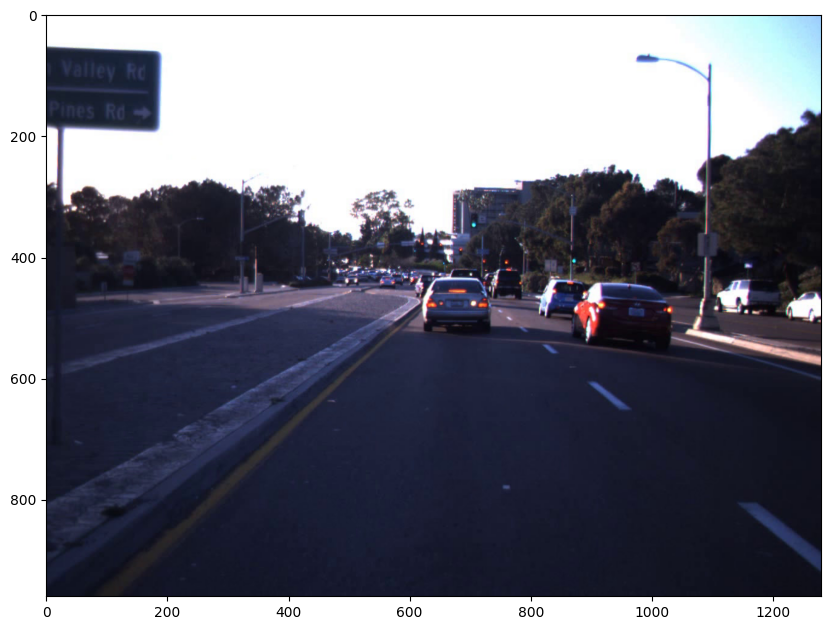

In [ ]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('./lisa_train/dayClip1--00012.jpg')
plt.figure(figsize=(10, 8))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [46]:
path = './lisa_train'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_train: 1803


## pycocotools를 이용한 COCO 데이터 

In [47]:
dataDir='./'
dataType='instances_train'
annFile='{}{}.json'.format(dataDir,dataType)
print(annFile)

./instances_train.json


**coco 객체 생성**

In [48]:
from pycocotools.coco import COCO

# COCO 데이터셋의 어노테이션 파일을 통해 coco 객체 초기화

coco = COCO(annFile)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


**category 정보**

In [49]:
# getCatIds(): COCO 데이터셋의 모든 category_id 값을 리스트 형태로 반환
print(coco.getCatIds())
print(len(coco.getCatIds()))

[1, 2, 3]
3


In [50]:
#loadCats() : category_id들을 리스트로 입력받아  category들에 대한 세부 정보 반환
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': '', 'id': 1, 'name': 'go'},
 {'supercategory': '', 'id': 2, 'name': 'stop'},
 {'supercategory': '', 'id': 3, 'name': 'warning'}]

In [51]:
# coco.getCatIds()는 모든 category_id 리스트 반환
# coco.getCatIds(catIds=이름)는 지정된 이름에 대한 category id 반환

catIds = coco.getCatIds(catNms=['warningLeft'])
catIds

[]

**image 정보**

In [ ]:
# coco.getImgIds(catIds=catIds) : 해당 catogory_id별로 한개의 image id을 임의로 출력
imgIds = coco.getImgIds(catIds=catIds)
imgIds

In [ ]:
#loadImgs(ids=imgIds) : 인자로 들어온 image id들에 대한 상세 정보 반환
imgs = coco.loadImgs(ids=imgIds)
len(imgs)

20535

In [ ]:
# 개별 image id로 상세 정보 추출
imgId = imgIds[0] # 175
img = coco.loadImgs(ids=imgId) # 한 이미지에 대한 상세 정보
img

[{'license': 1,
  'file_name': 'dayClip8--00567.jpg',
  'height': 960,
  'width': 1280,
  'id': 0}]

## 데이터 시각화

In [ ]:
img = img[0]
img['file_name']

'dayClip8--00567.jpg'

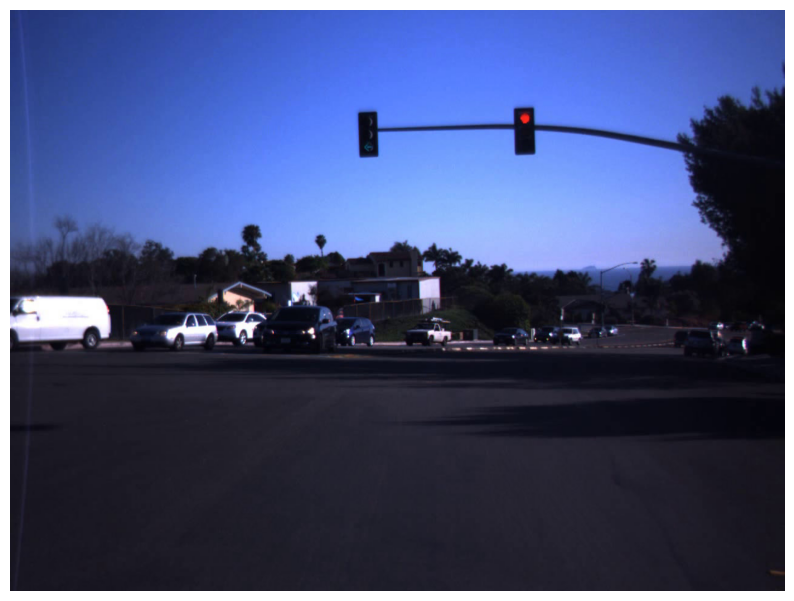

In [ ]:
import cv2
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

file_path = './lisa_train/' + img['file_name']

image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(image)
plt.show()

In [ ]:
img

{'license': 1,
 'file_name': 'dayClip8--00567.jpg',
 'height': 960,
 'width': 1280,
 'id': 0}

In [ ]:
# getAnnIds() : 해당 image의 annotation을 가져오기
# 한 image는 여러 annotation 정보가 있음
coco.getAnnIds(imgIds=img['id'])

[]

In [ ]:
# 위의 코드에 catIds를 추가로 지정해 주면 해당 category의 annotation만 가져옴
catIds = coco.getCatIds(catNms=['warningLeft']) # 6
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
annIds

[]

In [ ]:
anns = coco.loadAnns(annIds)
len(anns)

0

In [ ]:
# 2개 중의 하나
ann0_4seg= anns[0]['segmentation'][0]
ann0_4seg[:4] # x, y 좌표

IndexError: ignored

In [ ]:
# showAnns() : annotation 정보들을 입력받아서 시각화 
# 단, matplotlib으로 시각화 할 수 있는 이미지 배열이 로드되어 있어야 함
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
coco.showAnns(anns)

## lisa-traffic-light Dataset을 COCO Format으로 변환하기

In [52]:
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.coco import CocoDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 VOCDataset을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class LisaDataset(CocoDataset):   
  CLASSES = ('go', 'stop', 'warning')

**config 파일 수정하기**

In [53]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r101_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', 

**mask_rcnn pretrained model**

In [65]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_1x_coco/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth \
      -O checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2023-05-17 01:06:02--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r101_fpn_1x_coco/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.210, 8.25.82.208, 8.25.82.212, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243515233 (232M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth’

checkpoints/faster_ 100%[===================>] 232.23M  9.24MB/s    in 25s     

2023-05-17 01:06:28 (9.16 MB/s) - ‘checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth’ saved [243515233/243515233]



In [ ]:
/content/mmdetection/configs/faster_rcnn/faster_rcnn_r101_fpn_1x_coco.py

In [66]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'LisaDataset'
cfg.data_root = './'

cfg.data.test.type = 'LisaDataset'
cfg.data.test.data_root = './'
cfg.data.test.ann_file = 'instances_test.json'
cfg.data.test.img_prefix = 'lisa_test'

cfg.data.train.type = 'LisaDataset'
cfg.data.train.data_root = './'
cfg.data.train.ann_file = 'instances_train.json'
cfg.data.train.img_prefix = 'lisa_train'

cfg.data.val.type = 'LisaDataset'
cfg.data.val.data_root = './'
cfg.data.val.ann_file = 'instances_val.json'
cfg.data.val.img_prefix = 'lisa_val'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
#cfg.model.roi_head.mask_head.num_classes = 6

# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = '/content/mmdetection/checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/LISA Dataset/lisa'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
# cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# max epochs 12 
cfg.runner.max_epochs = 5 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
# cfg.data.samples_per_gpu = 2 # 기본값 변경시에만설정

# Change the evaluation metric since we use customized dataset.
# note.
# detection evaluation에 map를 설정하면 iou가 0.5 일때만
# cocodata로 detection 할 때는 bbox를 설정해야 다양한 iou 기준 출력
# cocodata로 segmentation 할때는 bbox, segm을 지정
# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
cfg.evaluation.metric = ['bbox', 'segm']

# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained',
                      checkpoint='torchvision://resnet101')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', 

**Config에서 설정한 Lisa Dataset 적용**

In [67]:
from mmdet.datasets import build_dataset

# Build dataset
train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [246]:
'''
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
        count += len(files)
    return count
'''




# lisa_train img 파일
path = './lisa_train'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_train: 1803


In [68]:
train_dataset # 18013개의train imgage


LisaDataset Train dataset with number of images 1803, and instance counts: 
+----------+-------+----------+-------+-------------+-------+----------+-------+----------+-------+
| category | count | category | count | category    | count | category | count | category | count |
+----------+-------+----------+-------+-------------+-------+----------+-------+----------+-------+
|          |       |          |       |             |       |          |       |          |       |
| 0 [go]   | 2437  | 1 [stop] | 2609  | 2 [warning] | 160   |          |       |          |       |
+----------+-------+----------+-------+-------------+-------+----------+-------+----------+-------+

In [ ]:
'''
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
        count += len(files)
    return count
'''





# lisa_train img 파일
path = './lisa_train'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

Total number of files in ./lisa_train: 20535


**Config에서 설정한 모델 적용**

In [58]:
from mmdet.models import build_detector

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = train_dataset.CLASSES

## 학습 수행

In [261]:
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: ignored

In [69]:
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True) # validate=True : validation 데이터로 evaluation

2023-05-17 01:10:16,301 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2023-05-17 01:10:16,323 - mmdet - INFO - load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r101_fpn_1x_coco_20200130-f513f705.pth


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2023-05-17 01:10:16,623 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([4]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([12, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([12]).
2023-05-17 01:10:16,629 - mmdet - INFO - Start running, host: root@940b23b95a87, work_dir: /content/drive/MyDrive/LISA Dataset/lisa
2023-05-17 01:10:16,631 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_

# 파일 크기 줄이기
- 2023-05-16 08:54:08,497 - mmdet - INFO - Epoch [1][900/902]	lr: 2.500e-03, eta: 0:00:01, time: 0.754, data_time: 0.009, memory: 4735, loss_rpn_cls: 0.0014, loss_rpn_bbox: 0.0072, loss_cls: 0.0609, acc: 97.8418, loss_bbox: 0.0987, loss: 0.1683
2023-05-16 08:54:10,206 - mmdet - INFO - Saving checkpoint at 1 epochs

# annotion획일화
- 2023-05-16 09:16:39,200 - mmdet - INFO - Epoch [1][900/902]	lr: 2.500e-03, eta: 0:00:01, time: 0.769, data_time: 0.013, memory: 5434, loss_rpn_cls: 0.0006, loss_rpn_bbox: 0.0076, loss_cls: 0.0541, acc: 97.7832, loss_bbox: 0.1037, loss: 0.1660
2023-05-16 09:16:40,863 - mmdet - INFO - Saving checkpoint at 1 epochs

'''
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
        count += len(files)
    return count
'''




# lisa_train img 파일
path = './lisa_train'
count = count_files(path)
print(f'Total number of files in {path}: {count}')

#epoch 5

- 2023-05-17 02:06:08,440 - mmdet - INFO - Epoch [5][900/902]	lr: 2.500e-03, eta: 0:00:01, time: 0.746, data_time: 0.015, memory: 4736, loss_rpn_cls: 0.0003, loss_rpn_bbox: 0.0052, loss_cls: 0.0355, acc: 98.6328, loss_bbox: 0.0559, loss: 0.0968
2023-05-17 02:06:10,012 - mmdet - INFO - Saving checkpoint at 5 epochs

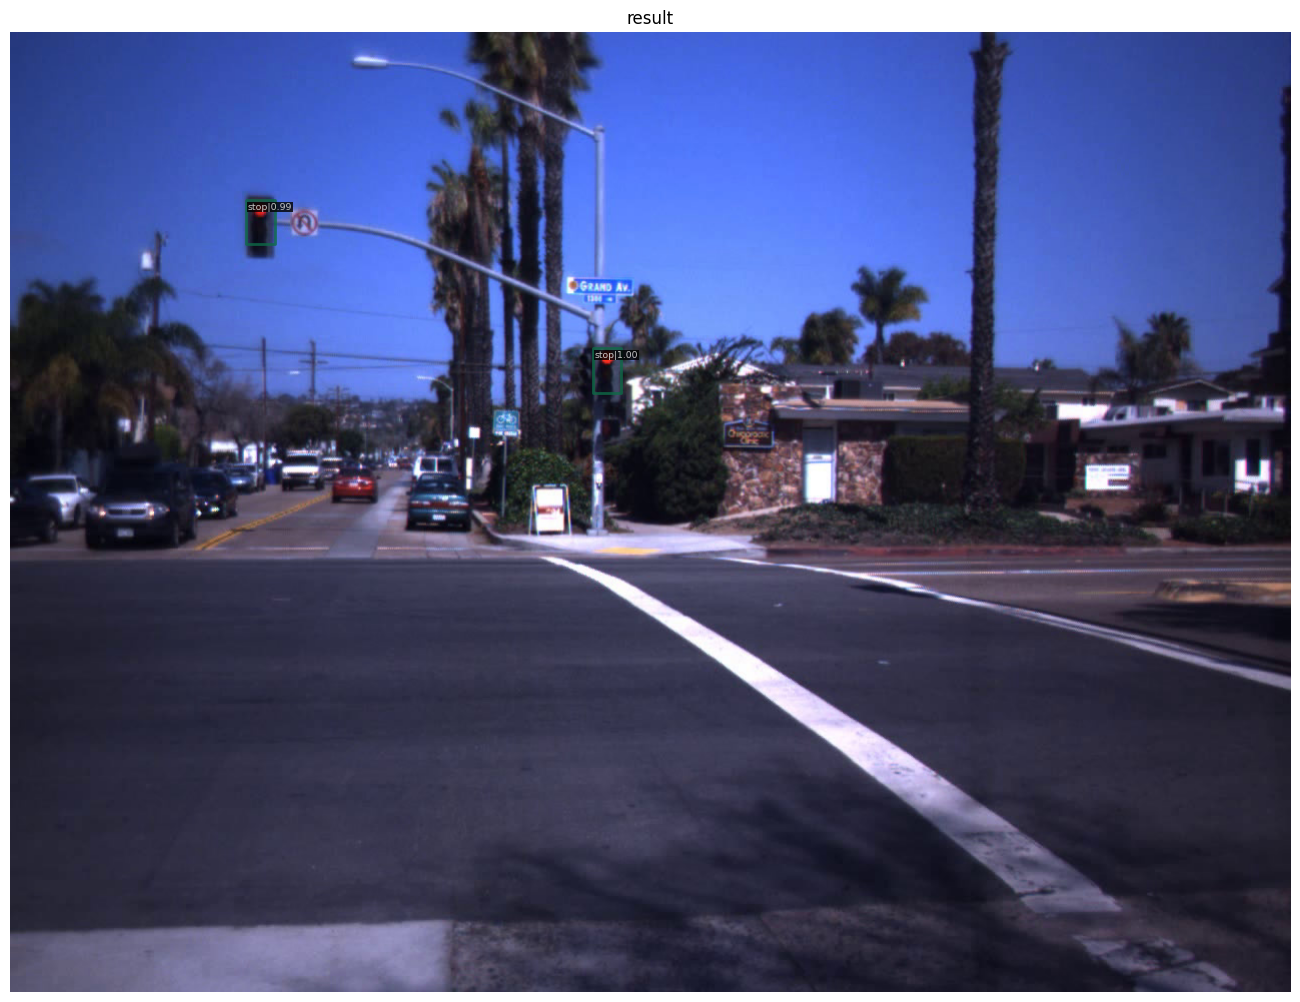

In [74]:
from mmdet.apis import show_result_pyplot

img = mmcv.imread('/content/mmdetection/lisa-traffic-light-dataset/daySequence2/daySequence2/frames/daySequence2--00400.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.4)

In [75]:
from mmdet.datasets import build_dataloader, build_dataset

data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

{'img_metas': [DataContainer([[{'filename': './lisa_test/nightSequence2--02150.jpg', 'ori_filename': 'nightSequence2--02150.jpg', 'ori_shape': (960, 1280, 3), 'img_shape': (800, 1067, 3), 'pad_shape': (800, 1088, 3), 'scale_factor': array([0.8335937, 0.8333333, 0.8335937, 0.8333333], dtype=float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32), 'std': array([58.395, 57.12 , 57.375], dtype=float32), 'to_rgb': True}}]])],
 'img': [tensor([[[[-2.1179, -2.1179, -2.1179,  ...,  0.0000,  0.0000,  0.0000],
            [-2.1179, -2.1179, -2.1179,  ...,  0.0000,  0.0000,  0.0000],
            [-2.1179, -2.1179, -2.1179,  ...,  0.0000,  0.0000,  0.0000],
            ...,
            [-2.0837, -2.0837, -2.0837,  ...,  0.0000,  0.0000,  0.0000],
            [-2.0837, -2.0837, -2.0837,  ...,  0.0000,  0.0000,  0.0000],
            [-2.0837, -2.0837, -2.0837,  ...,  0.0000,  0.0000,  0.0000]],
  
           [[-2.0357, -2.0357, -2.0